In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,precision_score,recall_score

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


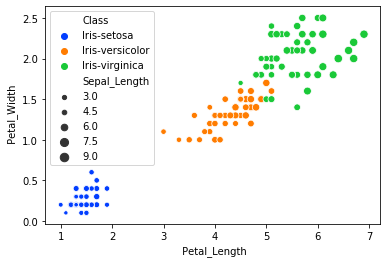

In [3]:
sns.scatterplot(x=' Petal_Length',y=' Petal_Width',hue='Class',palette='bright',size='Sepal_Length',data=df)

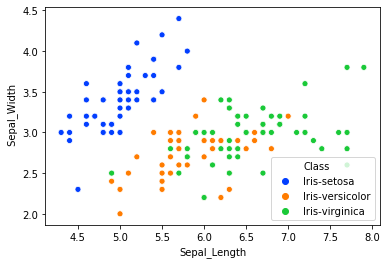

In [4]:
sns.scatterplot(x='Sepal_Length',y=' Sepal_Width',hue='Class',palette='bright',data=df)

In [5]:
train,test=train_test_split(df,train_size=0.7,random_state=42,shuffle=True)
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [6]:
x_train.shape

(105, 4)

In [7]:
x_test.shape

(45, 4)

In [8]:
y_train.shape

(105,)

In [9]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

### Using linear kernel

#### One-Vs-Rest

In [10]:
model=svm.SVC(kernel='linear',C=1,decision_function_shape='ovr')

In [11]:
model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9714285714285714
Testing accuracy:  1.0


In [12]:
print(confusion_matrix(y_test,predicted))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### One-Vs-One

In [13]:
model=svm.SVC(kernel='linear',C=10,decision_function_shape='ovo')

In [14]:
model.fit(x_train,y_train)
print('Training accuracy: {}'.format(model.score(x_train,y_train)))

predicted=model.predict(x_test)
print('Testing accuracy: ',accuracy_score(y_test,predicted))

Training accuracy: 0.9619047619047619
Testing accuracy:  0.9777777777777777


In [15]:
print(confusion_matrix(y_test,predicted))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
